<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Python</center></span>

<center> Regresión Ordinal</center>

<figure>
<center>
<img src="../Imagenes/regresion.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Regresión</p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro

##   <span style="color:blue">Profesores</span>

### Coordinador

- Campo Elías Pardo, PhD, cepardot@unal.edu.co

### Conferencistas

- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2021](https://github.com/AprendizajeProfundo/Diplomado)
1. [Alvaro Montenegro, Daniel Montenegro y Oleg Jarma, Inteligencia Artificial y Aprendizaje Profundo Avanzado, 2022](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)
1. [Tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Pytorchlightning.ai](https://www.pytorchlightning.ai/)
1. [How it works - Bike Share Regression PyTorch Lightning](https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20Bike%20Share%20Regression%20PyTorch%20Lightning.ipynb)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Instalar Pytorch-lightning](#Instalar-Pytorch-lightning)
* [Ejemplo de un módulo Lightning](#Ejemplo-de-un-módulo-Lightning)

## <span style="color:blue">Introducción</span> 

### ¿Qué es la regresión ordinal?

En estadística y aprendizaje automático, la regresión ordinal es una variante de los modelos de regresión que normalmente se utiliza cuando los datos tienen una variable ordinal. 

Variable ordinal significa un tipo de variable donde los valores dentro de la variable son categóricos pero en orden. También podemos encontrar el nombre de regresión ordinal como una clasificación ordinal porque puede considerarse un problema entre la regresión y la clasificación.

Podemos categorizar la regresión ordinal en dos categorías: `modelo logit ordenado` y `modelo probit ordenado`. 

### Modelo logit ordenado

También podemos llamar a este modelo un modelo logístico ordenado que funciona para variables dependientes ordinales y un modelo de regresión pura. Por ejemplo, tenemos revisiones de cualquier cuestionario sobre cualquier producto como malo, bueno, agradable y excelente en una encuesta y queremos analizar qué tan bien se pueden predecir estas respuestas para el próximo producto. Si las preguntas son cuantitativas, entonces podemos usar este modelo. Podemos pensarlo como una extensión de la regresión logística que permite más de dos categorías de respuesta ordenadas.

### Modelo probit ordenado

Podemos considerar este modelo como una variante del modelo probit, es con una variable dependiente ordinal donde podemos tener más de dos resultados. 

Una variable dependiente ordinal se puede definir como una variable en la que los valores tienen un orden natural, por ejemplo malo, bueno, bueno, excelente. 

### ¿Cómo hacer una regresión ordinal?

Para realizar una regresión ordinal, podemos usar un modelo lineal generalizado (GLM). 

GLM tiene la capacidad de ajustar un vector de coeficientes y un conjunto de umbrales a los datos. Digamos que en un conjunto de datos tenemos observaciones, representadas por vectores de longitud $p$, digamos $\mathbf{x}_1, \ldots, \mathbf{x}_n$, y para estas observaciones, tenemos las  respuestas ordinales $y_1,\ldots, y_n$. los vectores $y$ toman valores ordinales.

Un conjunto de umbrales es permite dividir la recta de números reales en segmentos, correspondientes a los niveles de respuesta que son similares a los números de segmentos.

Matemáticamente podemos representar este modelo como sigue. Suponemos que $y$ tiene $K$ categorías, digamos $c_0,\cdots,c_{K-1}$, ordenadas por algún criterio de orden $\prec$, talque $c_k \prec c_{k+1}$. Entonces se tiene que 

$$
\begin{align}
\theta_i  & =  net(W,b; \mathbf{x}_i)\\
z_0 & = 0 \\
\alpha_1 & = e^{a_1}\\
z_1 & = \alpha_1 \theta_i - (d+\tau_1)\\
\alpha_2 & = e^{a_2}\\
\delta_2 & = e^{\eta_2}\\
\tau_2 &= \tau_1 + \delta_2\\
z_2 & = [\alpha_1 \theta_i - (d+\tau_1)] + [\alpha_2 \theta_i - (d+\tau_2)]\\
&\cdots \\
\alpha_{k-1} & = e^{a_{k-1}}\\
\delta_{k-1} & = e^{\eta_{k-1}}\\
\tau_{k-1} &= \tau_{k-2} + \delta_{k-1}\\
z_{k-1} & = [\alpha_1 \theta_i - (d+\tau_1)] + [\alpha_2 \theta_i - (d+\tau_2)] + \cdots + [\alpha_{k-1} \theta_i - (d+\tau_{k-1})]\\
\end{align}
$$

Definimos el modelo estadístico como sigue.

$$
\theta  =  net(W,b; x),
$$

en donde $\theta$ es la variable latente asociada a la salida de la red $net(W,b; \cdot)$ para la entrada $x$, en donde $W$ y $b$ son los parámetros de pesos y sesgo de toda red.


Para $k=1,\cdots, K-1$ se definen logits $z_k$ como

$$
\begin{align}
z_k = \sum_{j=1}^{K-1} [\alpha_j \theta - (d + \tau_j)],
\end{align}
$$

en donde $\alpha_j>0$ son parámetros de discriminación para cada categoría, $d$ es un parámetro global de posición y $\tau_j$ representan parámetros de posición de cada categoría con respecto a $d$. Se adopta además que $\tau_1<\tau_2< \cdots< \tau_{K-1}$. Adicionalmente definimos $z_0=0$.

Para evitar problemas de identificabilidad se define $\alpha_0=1$ y  $\tau_0=0$. Por lo que los primeros tres logits son dados por 

$$
\begin{align}
z_0 & = [\theta-d] \\
z_1 & = [\theta-d] + [\alpha_1 \theta - (d+\tau_1)]\\
z_2 & = [\theta-d] + [\alpha_1 \theta - (d+\tau_1)] + [\alpha_2 \theta - (d+\tau_2)]\\
\end{align}
$$

Estos logits se convierten en probabilidades usando la función *softmax*. En otras palabras, el vector de probabilidades para asignar una entrada $x$ a una categoría es dado por

$$
[p_0, p_1,\cdots, p_{K-1}] = softmax([z_0,z_1,\cdots, z_{K-1}]).
$$

Por ejemplo

$$
p_k = \frac{e^{z_k}}{\sum_{j=0}^{K-1} e^{z_j}}
$$





Se ha asumido $a_0 = 0, \tau_0 = 0$, aunque esto último es irrelevante.

Donde,

+ $net(\cdot)$ es un perceptron con una capa oculta (posiblemente)
+ $W$ = es el parámetro de pesos de $net(\cdot)$
+ $b$ = es el parámetro de sesgos de $net(\cdot)$
+ $a_k, i = 1\cdots, K-1 $ son los logaritmos de los parámetros de discriminación
+ $d$ es un parámetro global de posición. 
+ $\tau_k$ son parámetros de posición de cada categoría. Observe que $\tau_1 < \tau_2 < \cdots < \tau_{k-1}$



Los umbrales son definidos como sigue

$$
\begin{align}
\eta_0 &= \theta_0\\
\eta_1 &= \eta_0  + \theta_1\\
&\cdots\\
\eta_{K-1} &= \eta_{K-2} + \theta_{K-1}\\
\end{align}
$$

La salida del modelo es el conjunto de logits $z_0, z_1, \cdots, z_{K-1}$

En esta lección $net(\cdot)$ será un perceptron de dos capas. La capa intermedia tendrá una dimensión de tamaño 10.

### Interpretación del modelo

In [ ]:
a = torch.nn.parameter.Parameter(data=torch.zeros(num_categ-1,)requires_grad=True)
delta = torch.nn.parameter.Parameter(data=torch.zeros(num_categ-2,)requires_grad=True)

## <span style="color:blue">Introducción</span> 

En esta lección, vamos a utilizar datos denominados `diamonds`. Puede encontrar estos datos en [Kaggle](https://www.kaggle.com/code/danielmarrama/diamond-exploratory-analysis-and-visualizations/data)   aquí. En el conjunto de datos, tenemos una variable que tiene una variable dependiente ordinal con algunas categorías en forma ordenada. Llamemos a los datos.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels import miscmodels
#from statsmodels.miscmodels import ordinal_model as OM
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
data_diam = pd.read_csv('../Datos/diamonds.csv')

In [ ]:
data_diam.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
data_diam.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [ ]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [ ]:
data_diam["cut"] = data_diam["cut"].astype(cat_type)

In [ ]:
data_diam['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [ ]:
data_diam['volume'] = data_diam['x']*data_diam['y']*data_diam['z']
data_diam.drop(['x','y','z'],axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution by Volume')

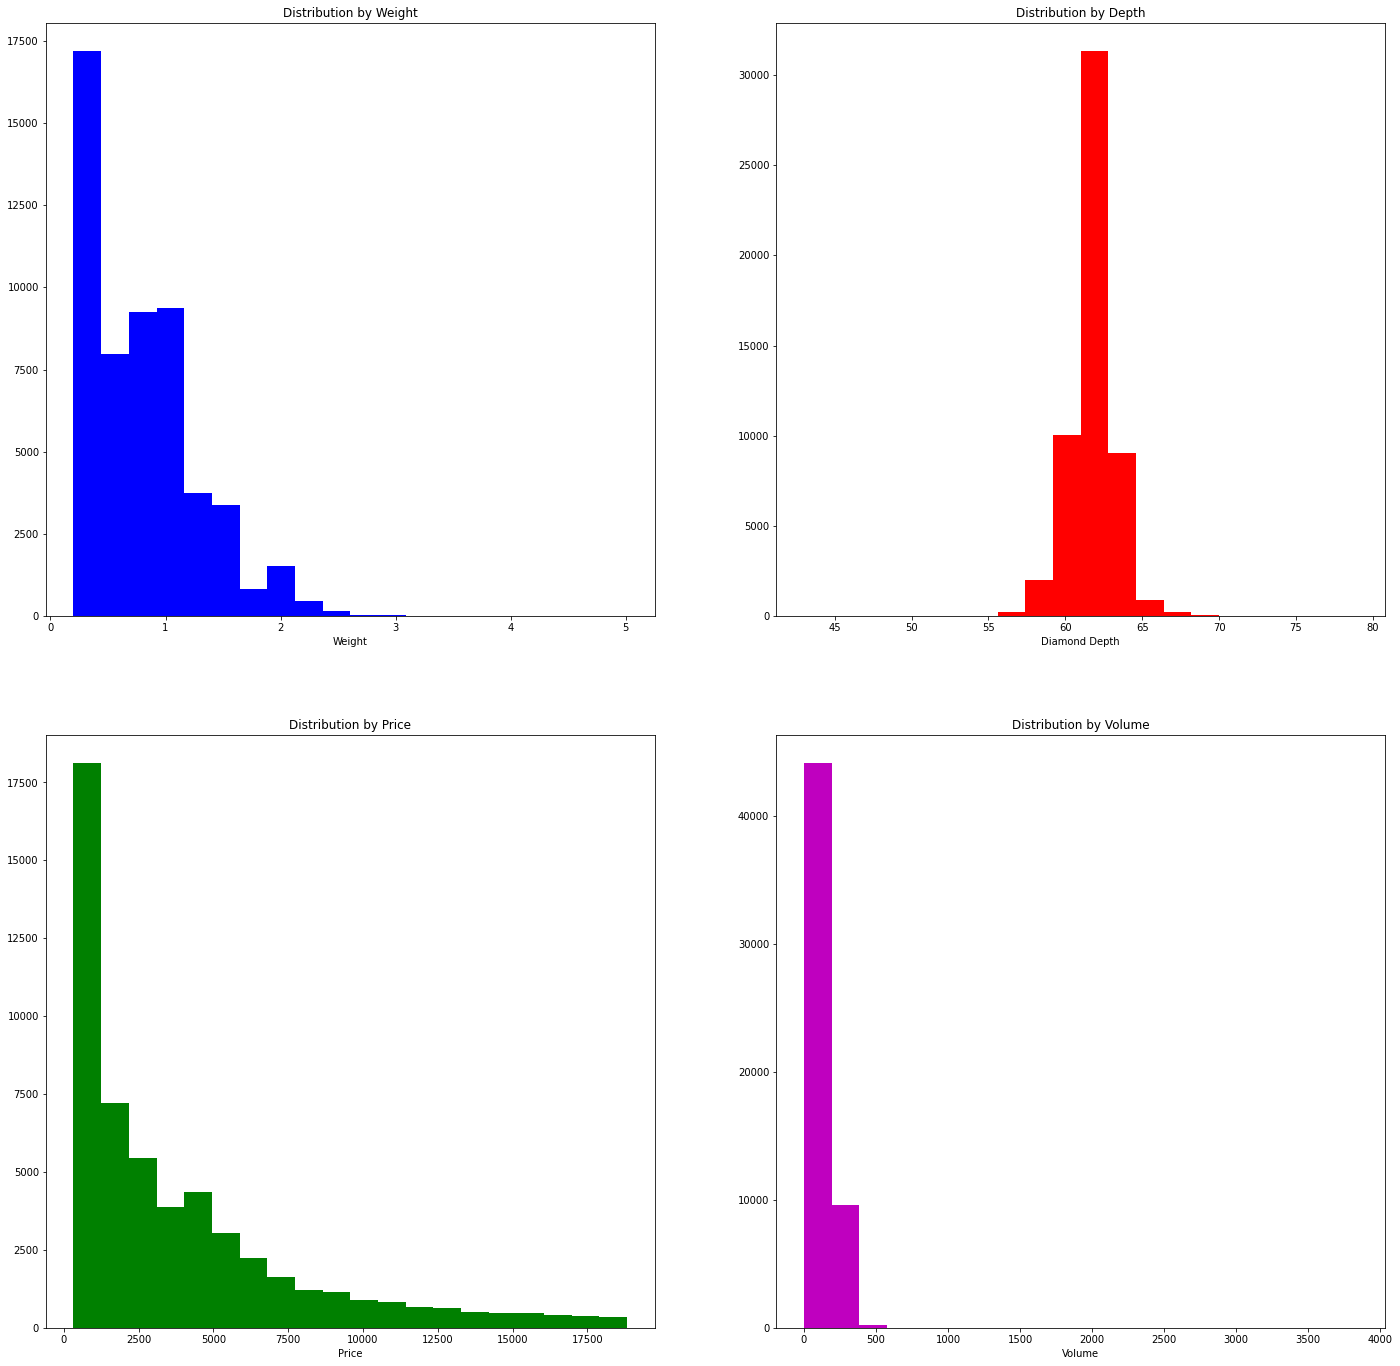

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[24,24])

plt.subplot(221)
plt.hist(data_diam['carat'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')

plt.subplot(222)
plt.hist(data_diam['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')

plt.subplot(223)
plt.hist(data_diam['price'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')

plt.subplot(224)
plt.hist(data_diam['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

In [ ]:
mod_prob = OrderedModel(data_diam['cut'],
                        data_diam[['volume', 'price', 'carat']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73850.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Wed, 30 Mar 2022                                         
Time:                        12:46:17                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0060      0.001     10.108      0.000       0.005       0.007
price              3.511e-05   3.01e-06     11.658      0.000    2.92e-05     4.1e-05
carat                -1.1049      0.097    -11.353      0.000      -1.296      -0.914
Fair/Good            -1.8589      0.016   -119.403      0.000      -1.889      -1.828
Good/Ideal           -0.3292      0.014    -24.056      0.000      -0.356      -0.302
Ideal/Very Good       0.2053      0.006     35.080      0.000       0.194       0.217
Very Good/Premium    -0.4986      0.008    -60.605      0.000      -0.515      -0.483
=====================================================================================
"""

In [ ]:
mod_prob = OrderedModel(data_diam['cut'],
                        data_diam[['volume', 'price', 'carat']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs', disp = False)
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Wed, 30 Mar 2022                                         
Time:                        12:46:27                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

In [ ]:
predicted = res_log.model.predict(res_log.params, exog=data_diam[['volume', 'price', 'carat']])
predicted

/usr/local/lib/python3.7/dist-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])

In [ ]:
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data_diam['cut'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.4013904338153504
